
# 01 MIAR- ACTIVIDAD FINAL

## POKÉMON HAZTE CON TODOS POKÉMON

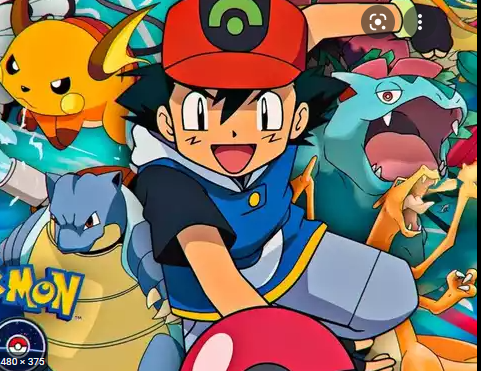

Desde siempre he sido un fanático de los pokémons, por eso me ha parecido ideal realizar esta actividad final con un dataset de pokémon, espero que lo disfrutes tanto como yo.
¡Empezemos!:


## Contenido:

### 1. Valores vacios 
* 1.1 Si estos valores están presentes o no
* 1.2 Visualización
* 1.3 Aprender a tratarlos

### 2. Análisis de tipos de datos 
### 3. Memoria consumida 
### 4. Exploración de datos 
### 5. Análisis de datos 


In [45]:
import numpy as np #libreria de matrizes 
import pandas as pd #libreria de estructura de datos
from matplotlib import pyplot as plt #libreria de generación de gráficos
import seaborn as sns #libreria desarrollada sobre matplotlib
import missingno as msno #visualización de distribución de los valores NaN's
import warnings
warnings.filterwarnings('ignore')#con estos nos evitamos posibles warning molestos

df_pokemon = pd.read_csv('pokemon.csv')#lectura de csv

print (df_pokemon.shape)#dimensiones del dataframe

(801, 41)


# 1.Valores vacios

En esta sección veremos:
* 1.1 Si estos valores estan presentes o no
* 1.2 Visualizarlos
* 1.3 Aprender a tratarlos

## 1.1 Chequeamos la presencia de valores nulos

In [6]:
df_pokemon.isnull().values.any()#esta función nos retorna false o True si hay valores nulos

True

Los valores vacios están presentes en el dataframe. Recopilamos las columnas con la presencia de valores nulos en una lista:

In [7]:
cols_missing_val = df_pokemon.columns[df_pokemon.isnull().any()].tolist()
print(cols_missing_val)

['height_m', 'percentage_male', 'type2', 'weight_kg']


hay 4 columnas con valores vacios:

Obtenemos el recuento exacto en cada una de las columnas que faltan:

In [8]:
for col in cols_missing_val:
    print("%s : %d" % (col, df_pokemon[col].isnull().sum()))

height_m : 20
percentage_male : 98
type2 : 384
weight_kg : 20


## 1.2 Visualizamos los valores vacios

<AxesSubplot:>

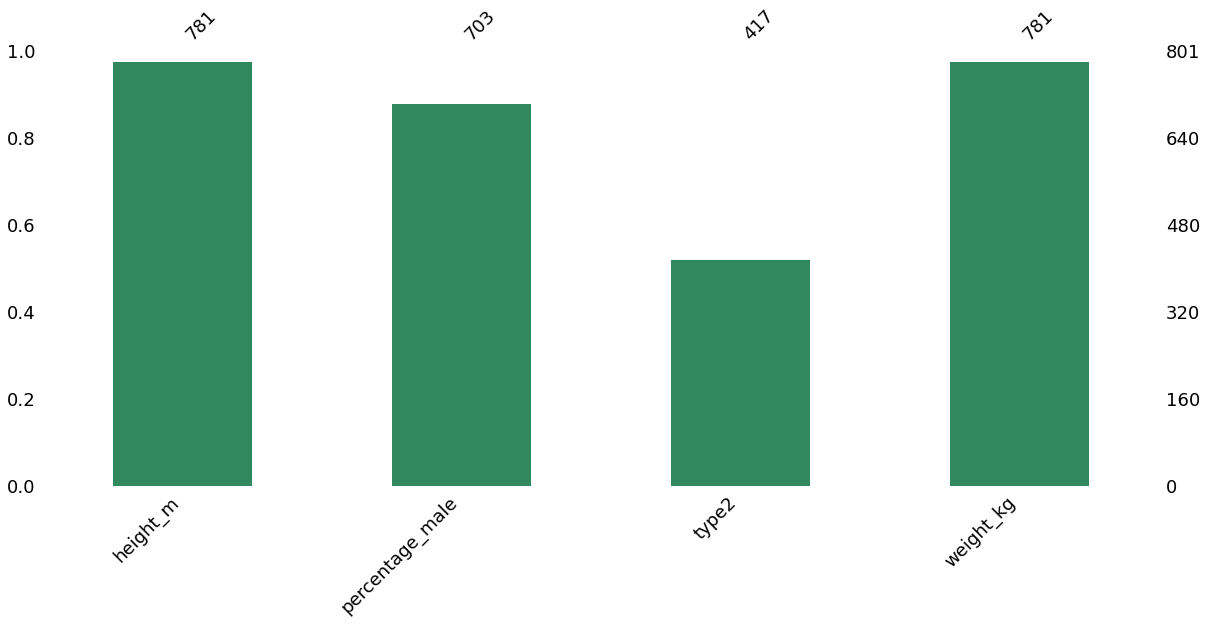

In [9]:
msno.bar(df_pokemon[cols_missing_val],figsize=(20,8),color="#32885e",fontsize=18,labels=True,)

<AxesSubplot:>

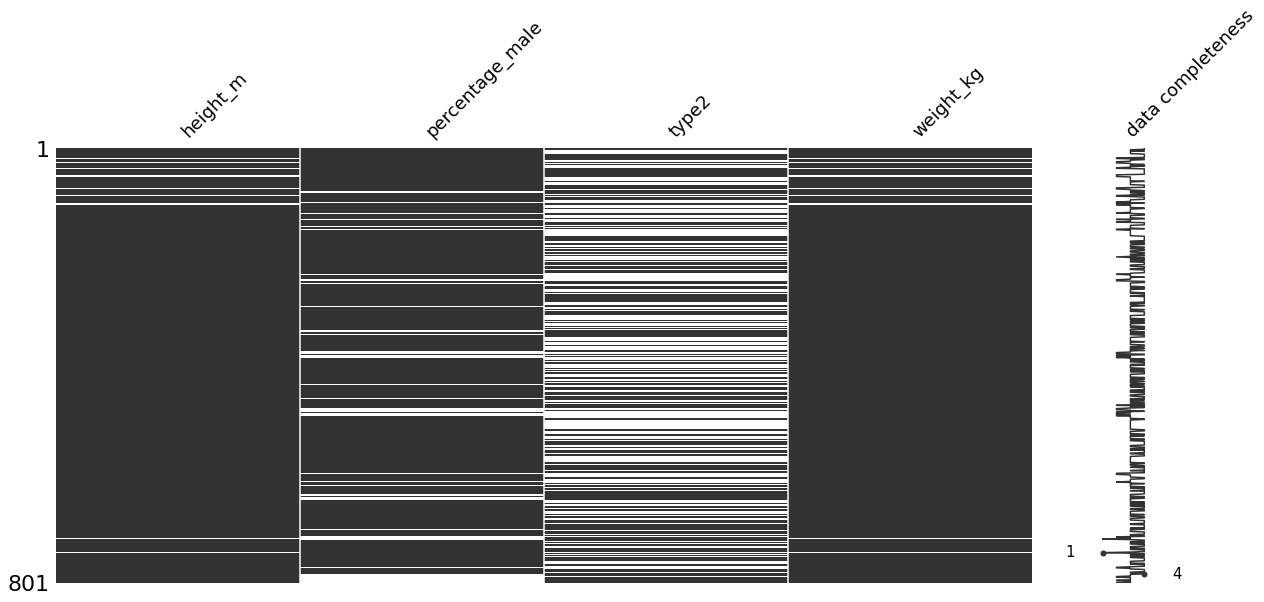

In [10]:
msno.matrix(df_pokemon[cols_missing_val],width_ratios=(10,1),\
            figsize=(20,8),color=(0.2,0.2,0.2),fontsize=18,sparkline=True,labels=True)

<AxesSubplot:>

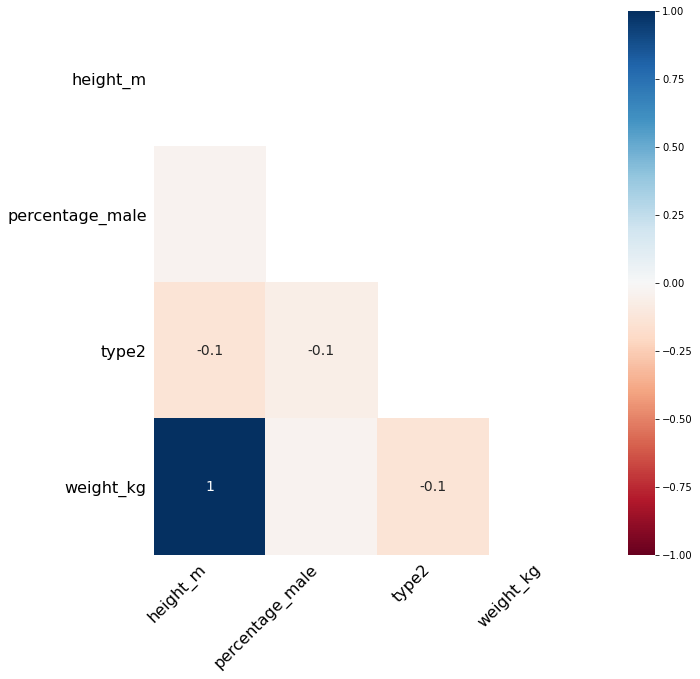

In [11]:
msno.heatmap(df_pokemon[cols_missing_val],figsize=(10,10))

## 1.3 Tratamos los valores vacios

Para imputar los valores vacios también deben de verse los demás valores.
El siguiente fragmento muestra los cantidad de los valores únicos en cada una de las columnas que tienen valors vacíos:

In [12]:
for col in cols_missing_val:
    print("%s : %d" % (col,df_pokemon[col].nunique()))

height_m : 51
percentage_male : 7
type2 : 18
weight_kg : 421


**percentage_male**

percentage_male: El porcentaje de especies que son masculinos. En blanco si el pokémon no tiene género

Por lo tanto a los pokémons sin género se le puede asignar un '-1'

In [14]:
df_pokemon['percentage_male'].fillna(np.int(-1), inplace=True)

**type2**

Veamos los diversos elementos de tipos que hay

In [15]:
df_pokemon['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

Asignaremos valor vacíos con alguna cadena que no este presente en la lista

In [16]:
df_pokemon['type2'].fillna('HHH', inplace=True)

**height_m** and **weight_kg**

Remplazamos los valores vacíos por un 0

In [17]:
df_pokemon['height_m'].fillna(np.int(0), inplace=True)
df_pokemon['weight_kg'].fillna(np.int(0), inplace=True)

Ahora verificamos si quedan valores faltantes

In [18]:
df_pokemon.isnull().values.any()

False

# 2. Análisis de tipos de datos

En esta sección veremos:
* Diferentes tipos de datos presentes en el df
* Los Visualizaremos

In [19]:
print(df_pokemon.dtypes.unique())
print(df_pokemon.dtypes.nunique())

[dtype('O') dtype('float64') dtype('int64')]
3


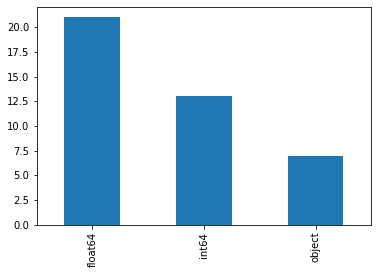

In [20]:
pp = pd.value_counts(df_pokemon.dtypes)
pp.plot.bar()
plt.show()

# 3. Consumo de memoria 

El uso de memoria es importante si se trata de un hardware de capacidad limitada 

En esta sección veremos:
* Como podemos monitorear el uso de memoria usando pandas
* Reducirlo utilizando diferentes tipos de datos

In [21]:
mem = df_pokemon.memory_usage(index=True).sum()
print("Memoria consumida por el set  :   {} MB" .format(mem/ 1024**2))

Memoria consumida por el set  :   0.25067901611328125 MB


Al alterar el tipo de datos podemos reducir la memoria

Primero reduciremos los primeros tipos de datos enteros

In [24]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['int']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(df_pokemon)

In [25]:
mem = df_pokemon.memory_usage(index=True).sum()
print("Memoria consumida por el set  :   {} MB" .format(mem/ 1024**2))

Memoria consumida por el set  :   0.25067901611328125 MB


Podemos ver una reducción en la memoria utilizada para almacenar dataframe

Ahora reduciremos las columnas del tipo **float64** a tipo **float32**.

In [26]:
def change_datatype_float(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        df[col] = df[col].astype(np.float32)
        
change_datatype_float(df_pokemon)

mem = df_pokemon.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   0.18651199340820312 MB


Podemos ver una mayor reducción en el uso de memoria. Así que, en general, hemos reducido el tamaño del marco de datos en ** ~ 50% ** de 0,25 MB a 0,12 MB.

# 4. Exploración de datos
Exploremos ahora los datos presentes en diferentes columnas según los distintos tipos.


In [27]:
object_cols = list(df_pokemon.select_dtypes(include=['object']).columns)

## Tipos primarios y secundarios

Cada Pokémon es un tipo primario (**tipo1**) o una combinación de tipo primario y secundario (**tipo2**). Como resultado, algunos Pokémon no tienen una variable de tipo2, por lo que se quedan con los valores nulos.

In [28]:
df_pokemon = df_pokemon.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('HHH', np.nan)

In [29]:
df_pokemon['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [30]:
df_pokemon['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [31]:
#--- Fragmento para dividir Pokémon en función de si son de tipo único o doble ---
single_type_pokemon = []
dual_type_pokemon = []

count = 0
for i in df_pokemon.index:
    if(pd.isnull(df_pokemon.type2[i]) == True):
    #if(df_pokemon.type2[i] == np.nan):
        count += 1
        single_type_pokemon.append(df_pokemon.name[i])
    else:
        dual_type_pokemon.append(df_pokemon.name[i])

print(len(dual_type_pokemon))
print(len(single_type_pokemon))

417
384


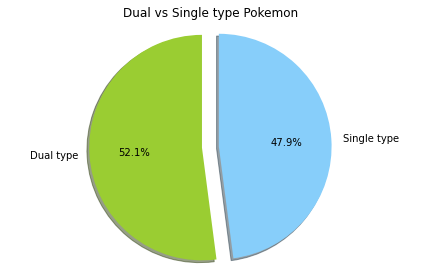

In [32]:
data = [417, 384]
colors = ['yellowgreen', 'lightskyblue']

# Crea un gráfico circular
plt.pie(data, 
        labels= ['Dual type', 'Single type'], 
        shadow=True, 
        colors=colors, 
        explode=(0, 0.15), 
        startangle=90, 
        autopct='%1.1f%%')

# Ver la trama de arriba
plt.axis('equal')
plt.title('Dual vs Single type Pokemon')
# Ver la trama
plt.tight_layout()
plt.show()

Distribución primaria de tipos de Pokémon:

Text(0.5, 1.0, 'Distribución primaria de tipos de Pokémon')

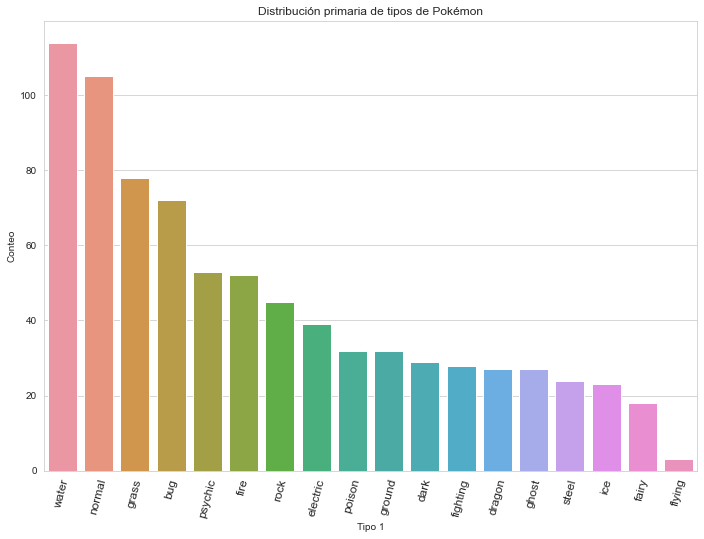

In [34]:
yy = pd.value_counts(df_pokemon['type1'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Tipo 1', ylabel='Conteo')
ax.set_title('Distribución primaria de tipos de Pokémon')

Distribución secundaria de tipos de Pokémon

Text(0.5, 1.0, 'Distribución secundaria de tipos de Pokémon')

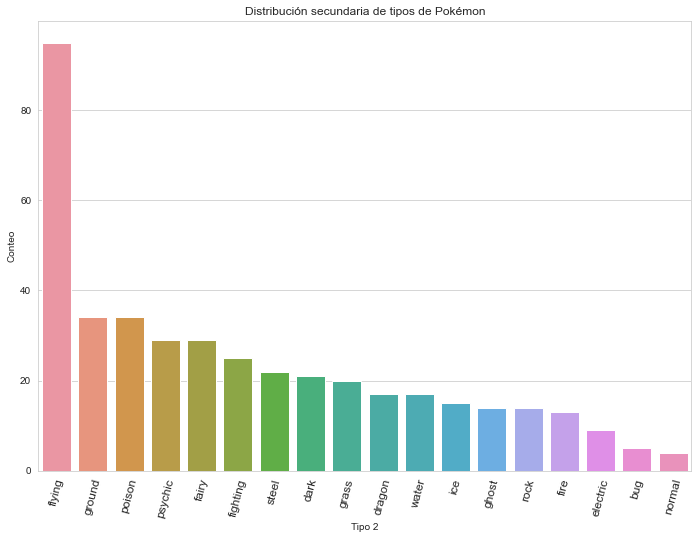

In [35]:
yy = pd.value_counts(df_pokemon['type2'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Tipo 2', ylabel='Conteo')
ax.set_title('Distribución secundaria de tipos de Pokémon')

¡Podemos ver que casi todos los tipos están presentes indistintamente en los tipos primarios y secundarios de Pokémon!

## Clasificación

La clasificación de los Pokémon, es tal como la describe la Pokédex del Sol y la Luna. Además de clasificar a los Pokémon según su tipo natural (roca, agua, fuego, etc.), también se pueden clasificar por sus rasgos físicos, como se muestra aquí.

In [36]:
df_pokemon['classfication'].nunique()

588

Hay más de 500 tipos de Pokémon clasificados según sus rasgos físicos. Veamos los 10 tipos de Pokémon más frecuentes.

In [37]:
ss = pd.value_counts(df_pokemon['classfication'])
for i in range(0, 10):
    
    print ("{} : {} ".format(ss.index[i],  ss[i]))

Dragon Pokémon : 8 
Mouse Pokémon : 6 
Mushroom Pokémon : 6 
Flame Pokémon : 5 
Balloon Pokémon : 5 
Fox Pokémon : 5 
Fairy Pokémon : 5 
Cocoon Pokémon : 4 
Drill Pokémon : 4 
Land Spirit Pokémon : 4 


## percentage_male

Esta característica explica como de masculino es el Pokémon. Cuanto mayor sea el porcentaje mayor es su masculinidad. Aquí está la lista de varios valores:
* 100% - masculino puro.
* 0% - femenino puro.
* -1 - sin género.


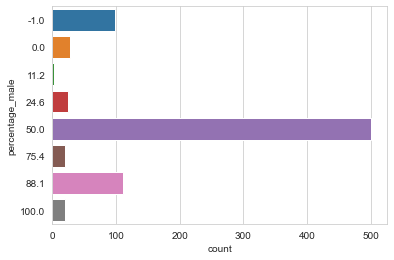

In [38]:
ax = sns.countplot(y=df_pokemon['percentage_male'], data=df_pokemon)  

Profundicemos en las siguientes subdivisiones:

In [39]:
print ('Pokémon puramente masculino : ', len(df_pokemon[df_pokemon.percentage_male == 100.0]))
print ('Pokémon puramente femeninos : ', len(df_pokemon[df_pokemon.percentage_male == 0.0]))
print ('Pokémon sin género : ', len(df_pokemon[df_pokemon.percentage_male == -1]))

print ('Pokémon más masculino : ', len(df_pokemon[df_pokemon.percentage_male > 50.0]))
print ('Pokémon más femeninos : ', len(df_pokemon[(df_pokemon.percentage_male < 50.0) & (df_pokemon.percentage_male > -1.0)]))

print ('Mezcla de pokemon femenino y masculino : ', len(df_pokemon[(df_pokemon.percentage_male < 100.0) & (df_pokemon.percentage_male > 0.0)]))

Pokémon puramente masculino :  19
Pokémon puramente femeninos :  27
Pokémon sin género :  98
Pokémon más masculino :  149
Pokémon más femeninos :  53
Mezcla de pokemon femenino y masculino :  657


## Tasa de captura

Describe la velocidad a la que un Pokémon puede ser capturado en una pokebol después de una pelea.

Veamos la lista de posibles valores:

In [40]:
df_pokemon['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

Text(0.5, 1.0, 'Distribución de Tasa captura contra el número de Pokémon')

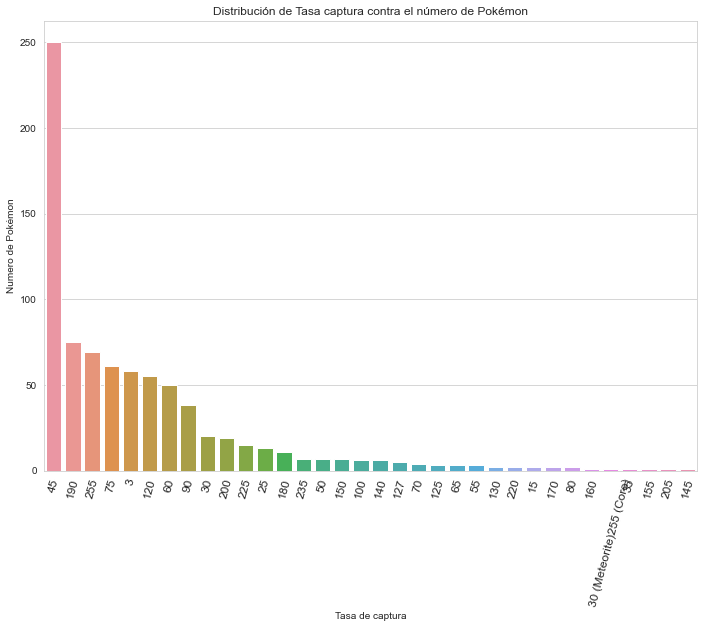

In [41]:
yy = pd.value_counts(df_pokemon['capture_rate'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=df_pokemon)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Tasa de captura', ylabel='Numero de Pokémon')
ax.set_title('Distribución de Tasa captura contra el número de Pokémon')

## Habilidades

Cada Pokémon puede tener uno o una lista de posibles poderes.

Veamos la lista de posibles habilidades:

In [42]:
df_pokemon['abilities'].nunique()

482

In [43]:
df_pokemon['abilities'].head(20).unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']"],
      dtype=object)

Como podemos ver, muchos Pokémon tienen más de una habilidad.

Necesitamos profundizar para ver si tales habilidades individuales están presentes y cuáles de ellas son las más frecuentes.

{'Turboblaze', 'Clear Body', 'Arena Trap', 'Effect Spore', 'Battle Bond', 'Iron Barbs', 'Rough Skin', 'Rivalry', 'Light Metal', 'Anticipation', 'Fluffy', 'Electric Surge', 'Symbiosis', 'Corrosion', 'Refrigerate', 'Grassy Surge', 'Rain Dish', 'Competitive', 'Swarm', 'Iron Fist', 'Sticky Hold', 'Harvest', 'Flower Gift', 'Power Construct', 'Innards Out', 'Sturdy', 'Power of Alchemy', 'Shields Down', 'Aroma Veil', 'Sniper', 'Prankster', 'Damp', 'Wonder Skin ', 'Cheek Pouch', 'Battle Armor', 'Tinted Lens', 'Slow Start', 'Swift Swim', 'Magician', 'Tough Claws', 'Beast Boost', 'Levitate', 'Skill Link', 'Magnet Pull', 'Lightningrod', 'Queenly Majesty', 'Disguise', 'Volt Absorb', 'Motor Drive', 'Speed Boost', 'Fur Coat', 'Hyper Cutter', 'Defeatist', 'Sheer Force', 'Anger Point', 'Full Metal Body', 'Compoundeyes', 'No Guard', 'Heavy Metal', 'Aftermath', 'Mold Breaker', 'Honey Gather', 'Protean', 'Illusion', 'Sap Sipper', 'Grass Pelt', 'Liquid Voice', 'Analytic', 'Drizzle', 'Adaptability', 'Moody

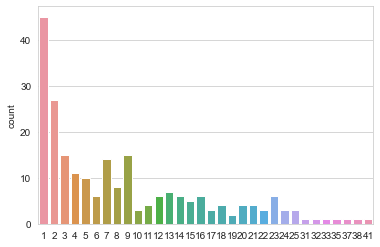

In [46]:
import re
list_ability = df_pokemon['abilities'].tolist()
len(list_ability)
new_list = []
for i in range(0, len(list_ability)):
    m = re.findall(r"'(.*?)'", list_ability[i], re.DOTALL)
    for j in range(0, len(m)):
        new_list.append(m[j])

list1 = set(new_list)
print(list1)
print(len(list1))



from collections import Counter
count  = pd.Series(df_pokemon['abilities'].str.replace('[\[\]\'\s]','').str.split(',').map(Counter).sum())

print(count.index)
ax = sns.countplot(count)

¡Así que tenemos 227 habilidades únicas para los 801 Pokémon!

Así que hasta ahora hemos visto todas las características del tipo de objeto (tipos de datos de cadena).

Pasemos ahora a las características de los tipos de datos numéricos.

## Número de Pokédex
Aquí a cada Pokémon se le asigna un número del 1 al 801.

In [47]:
df_pokemon['pokedex_number'].describe()

count    801.000000
mean     401.000000
std      231.373075
min        1.000000
25%      201.000000
50%      401.000000
75%      601.000000
max      801.000000
Name: pokedex_number, dtype: float64

## Altura y peso

* **height_m**  : Altura del pokémon en metros
* **weight_kg**: El peso del pokémon en kilogramos

Visualicemos la distribución de Pokémon a lo largo del rango de altura y peso:

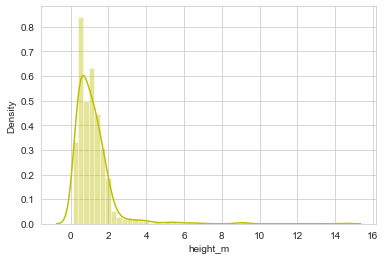

In [48]:
ax_height = sns.distplot(df_pokemon['height_m'], color="y")

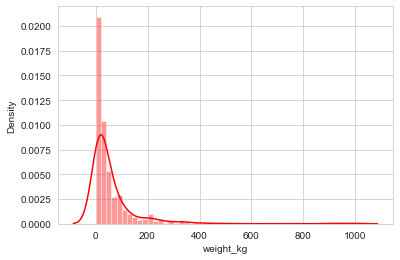

In [49]:
ax_weight = sns.distplot(df_pokemon['weight_kg'], color="r")

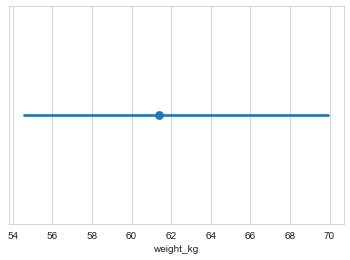

In [50]:
#--- Peso medio ---
ax = sns.pointplot(df_pokemon['weight_kg'])

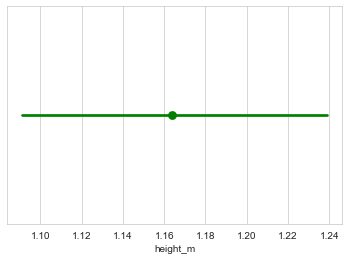

In [51]:
#---Altura media ---
ax = sns.pointplot(df_pokemon['height_m'], color = 'g')

***Observaciones:***
* El peso y la altura promedio son ~ 59 kg y ~ 113 m respectivamente.
* La mayoría de los Pokémon tienen una altura de 0,1 a 4 m y pesan entre 1 y 200 kg.

## base_egg_steps

La cantidad de pasos necesarios para incubar un huevo del Pokémon.

In [52]:
df_pokemon['base_egg_steps'].nunique()

10

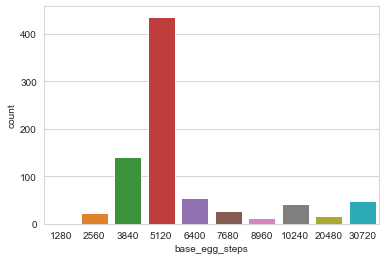

In [53]:
ax = sns.countplot(df_pokemon['base_egg_steps'])

***Observaciones:***
* Solo hay 10 pasos únicos para que un huevo eclosione
* La mayoría de los huevos de Pokémon toman 5120 pasos para eclosionar.

## experience_growth

El crecimiento de la experiencia del Pokémon

In [54]:
df_pokemon['experience_growth'].nunique()

6

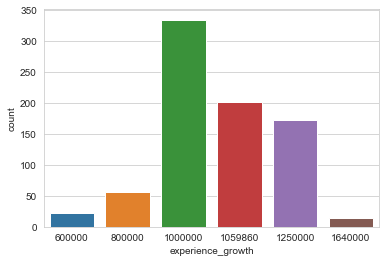

In [57]:
ax = sns.countplot(df_pokemon['experience_growth'])

***Observaciones:***
* Solo hay 6 niveles únicos de experiencia.
* La mayoría de los Pokémon tienen experiencia en el rango 1M - 1.25M

***¿Qué se puede hacer?***
* Podemos ver qué tipo de Pokémon primario tiene el máximo crecimiento de experiencia.
* Comprender la correlación entre los pasos del huevo y la experiencia.
Para realizar en la sección de Análisis de datos. 

## base_happiness

Felicidad básica del Pokémon.

In [58]:
df_pokemon['base_happiness'].nunique()

6

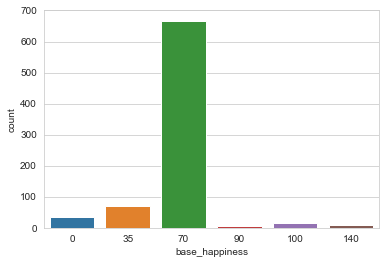

In [59]:
ax = sns.countplot(df_pokemon['base_happiness'])

***Observaciones:***
* Hay 6 niveles únicos de felicidad.
* La mayoría de los Pokémon tienen un índice de felicidad de 70
* ¡¡Muy pocos son extremadamente felices !! :)
* Un puñado de Pokémon siempre está enfadado :(

***¿Qué se puede hacer?***
* Podemos ver si esto decide su nivel de fuerza o no.

## hp

La base HP del Pokémon

In [60]:
df_pokemon['hp'].nunique()

99

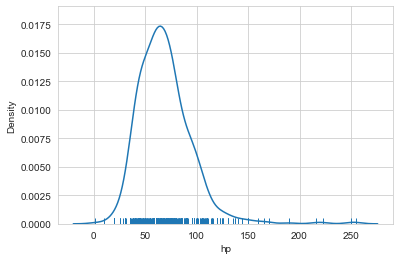

In [61]:
ax = sns.distplot(df_pokemon['hp'], rug=True, hist=False)

***Observaciones:***
* La mayoría de los Pokémon tienen HP base en el rango de 25 a 150.

***¿Qué se puede hacer?***

Podemos ver si esto decide su:
* nivel de fuerza,
* profundidad en el ataque
* Resistencia a otros ataques.

## Ataque y defensa del pokémon

La base de defensa y ataque del pokémon

In [62]:
print(df_pokemon['attack'].nunique())
print(df_pokemon['defense'].nunique())

114
109


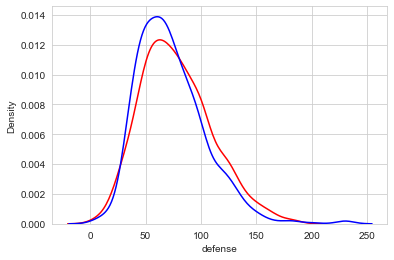

In [63]:
ax_attack = sns.distplot(df_pokemon['attack'], color="r", hist=False)
ax_defense = sns.distplot(df_pokemon['defense'], color="b", hist=False)

## sp_attack and sp_defense

El ataque especial base y la defensa especial base del Pokémon.

In [64]:
print(df_pokemon['sp_attack'].nunique())
print(df_pokemon['sp_defense'].nunique())

111
97


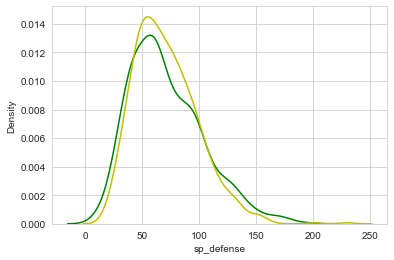

In [65]:
ax_attack = sns.distplot(df_pokemon['sp_attack'], color="g", hist=False)
ax_defense = sns.distplot(df_pokemon['sp_defense'], color="y", hist=False)

***Observaciones:***
* La mayoría de los Pokémon tienen ataque y defensa base y los especiales relacionados en el rango de 25 a 150.
* El rango final de la defensa es mayor que el del ataque.

***¿Qué se puede hacer?***
* Correlación entre ataque y ataque_especial. Lo mismo ocurre con la defensa.
* Relación con base_hp.
* Relación con el tipo primario / secundario de Pokémon.

## against_

Hay 18 características que indican la cantidad de daño recibido contra un ataque de un tipo en particular.

Obtengamos la lista de columnas que tienen una cadena ** against _ **

In [66]:
cols = df_pokemon.columns
against_ = []
for col in cols:
    if ('against_' in str(col)):
        against_.append(col)
        
print(len(against_)) 
print(against_)

18
['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


Tenemos 18 según lo requerido y mencionado.

Nos gustaría tener una lista de valores únicos en todas estas columnas.

In [67]:
unique_elem = []
for col in against_:
    unique_elem.append(df_pokemon[col].unique().tolist())
    
result = set(x for l in unique_elem for x in l)

result = list(result)
print(result)


[0.5, 1.0, 2.0, 0.25, 4.0, 0.0]


Podemos ver que solo toma dentro de los 6 valores anteriores.

Ahora podemos tomar el promedio de cada una de estas columnas y encontrar el máximo para determinar a qué ataque son susceptibles la mayoría de los Pokémon.

In [68]:
for col in against_:
    if (np.mean(df_pokemon[col]) > 1.2):
        print(col)

for col in against_:
    if (np.sum(df_pokemon[col]) > 1000):
        print(col)            

against_ice
against_rock
against_rock


Vemos que la mayoría de los Pokémon son más susceptibles a los ataques de Pokémon de hielo y roca.

Veamos la distribución de estos valores en cada una de las columnas:

against_bug
[1.   0.5  0.25 2.   4.  ]


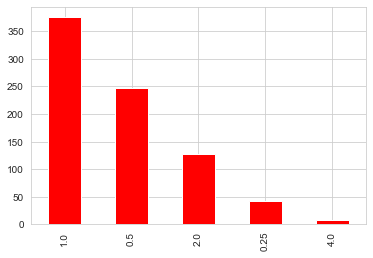

against_dark
[1.   0.5  2.   0.25 4.  ]


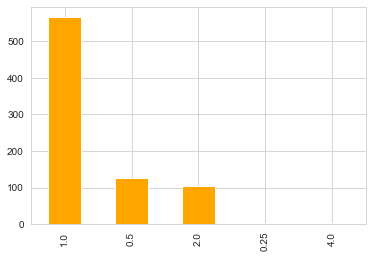

against_dragon
[1.  0.  0.5 2. ]


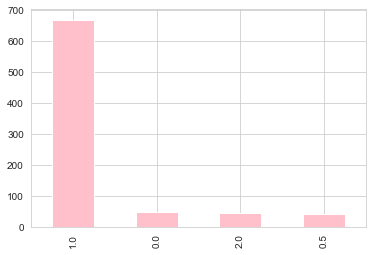

against_electric
[0.5  1.   2.   0.   4.   0.25]


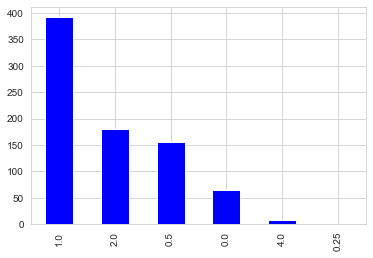

against_fairy
[0.5  1.   2.   0.25 4.  ]


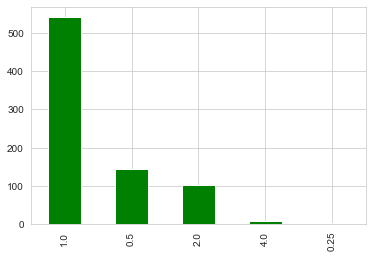

against_fight
[0.5  1.   0.25 2.   0.   4.  ]


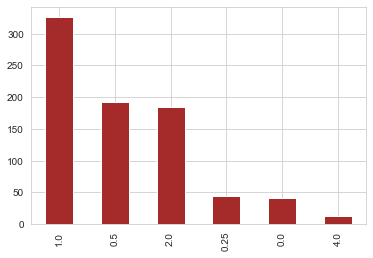

against_fire
[2.   0.5  1.   4.   0.25]


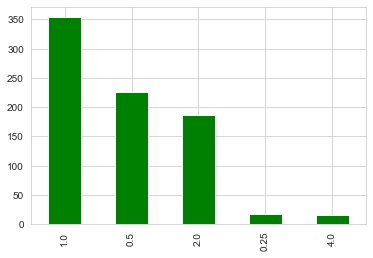

against_flying
[2.   1.   0.5  4.   0.25]


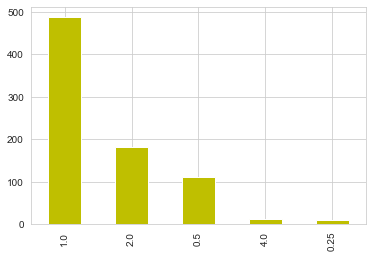

against_ghost
[1.  0.  2.  0.5 4. ]


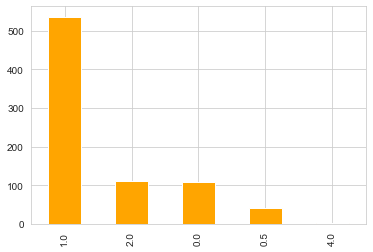

against_grass
[0.25 0.5  2.   1.   4.  ]


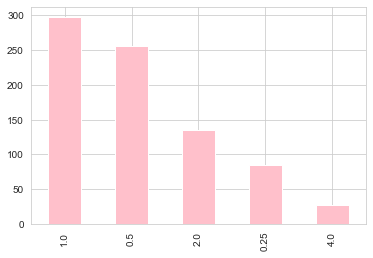

against_ground
[1.   2.   0.   0.5  0.25 4.  ]


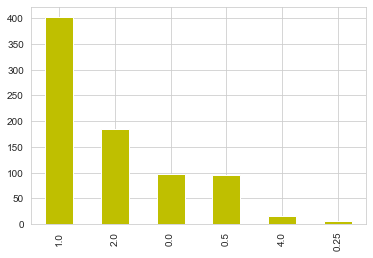

against_ice
[2.   0.5  1.   0.25 4.  ]


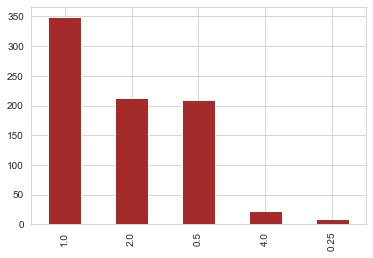

against_normal
[1.   0.5  0.   0.25]


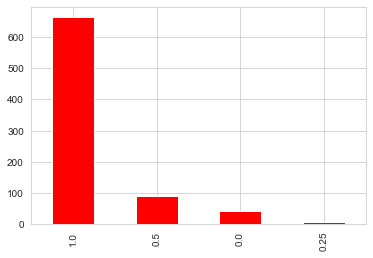

against_poison
[1.   0.5  0.25 2.   0.   4.  ]


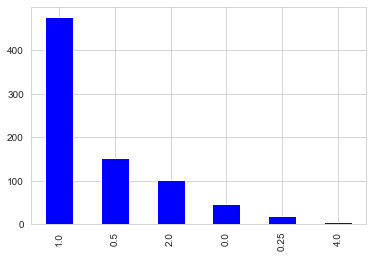

against_psychic
[2.   1.   0.5  0.   0.25 4.  ]


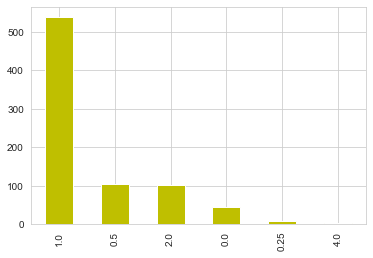

against_rock
[1.   2.   4.   0.5  0.25]


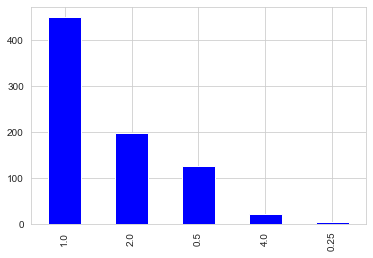

against_steel
[1.   0.5  2.   0.25 4.  ]


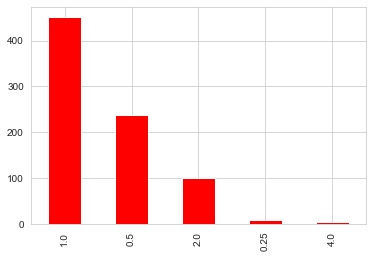

against_water
[0.5  2.   1.   4.   0.25]


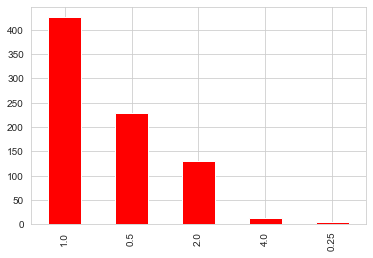

In [69]:
import random

for col in range(0, len(against_)):
    print (against_[col])
    print (df_pokemon[against_[col]].unique())
    pp = pd.value_counts(df_pokemon[against_[col]])
    
    color = ['g', 'b', 'r', 'y', 'pink', 'orange', 'brown']
            
    pp.plot.bar(color = random.choice(color))
    plt.show()

***Observaciones:***
* La mayoría de los Pokémon sufren cada ataque de al menos 1.0.
* Hay algunos pokemon que pueden resistir ciertos ataques.

***¿Qué se puede hacer?***
* Podemos relacionar qué tipo de Pokémon es más susceptible a los ataques contra ciertos tipos de Pokémon.

## velocidad

La velocidad base del Pokémon

In [70]:
print(df_pokemon['speed'].nunique())

113


In [71]:
df_pokemon['speed'].describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: speed, dtype: float64

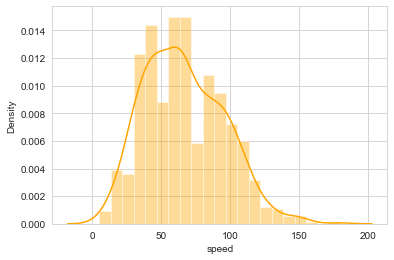

In [72]:
ax_height = sns.distplot(df_pokemon['speed'], color="orange")

Ahora bien, ¿cuál es el Pokémon más rápido y más lento?

In [73]:
print('Fastest Pokemon: {}'.format(df_pokemon.name[df_pokemon['speed'].idxmax()] ))
print('Slowest Pokemon: {}'.format(df_pokemon.name[df_pokemon['speed'].idxmin()] ))

Fastest Pokemon: Deoxys
Slowest Pokemon: Shuckle


Podemos llegar a nuestra definición de velocidad.

* Pokémon rápido> Media + Standard_dev
* Pokemon lento < Media - Standard_dev
* Pokémon muy rápidos> Media + 2 (Standard_dev)
* Pokemon muy lento < Media - 2 (Standard_dev)

Veamos lo que obtenemos:

Text(0.5, 1.0, 'Recuento de Pokémon para diferentes niveles de velocidad.')

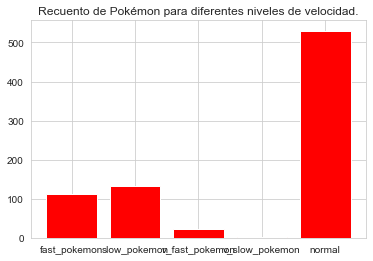

In [75]:
speed_statistics = df_pokemon['speed'].describe()

mean = speed_statistics[1]
standard_dev = speed_statistics[2]

#--- Creamos la lista para las cuatro categorías mencionadas ---
fast_pokemon = []
slow_pokemon = []
v_fast_pokemon = []
v_slow_pokemon = []
normal = []

for i in range(0, len(df_pokemon)):
    if(df_pokemon.speed[i] > mean + (2 * standard_dev)):
        v_fast_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] < mean - (2 * standard_dev)):
        v_slow_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] > mean + standard_dev):
        fast_pokemon.append(df_pokemon.name[i])
    elif(df_pokemon.speed[i] < mean - standard_dev):
        slow_pokemon.append(df_pokemon.name[i])
    else:
        normal.append(df_pokemon.name[i])
    
speed_levels = ['fast_pokemon','slow_pokemon','v_fast_pokemon','v_slow_pokemon','normal']
speed_count = [len(fast_pokemon), len(slow_pokemon), len(v_fast_pokemon),len(v_slow_pokemon),len(normal)]

xlocations = np.array(range(len(speed_count)))
width = 0
plt.bar(xlocations, speed_count, color = 'r')
plt.xticks(xlocations+ width, speed_levels)
#xlim(0, xlocations[-1]+width*2)
plt.title("Recuento de Pokémon para diferentes niveles de velocidad.")

***Observaciones:***
* Más de 500 Pokémon tienen una velocidad dentro de la media y la desviación estándar única que es normal para nuestros estándares.
* Una pequeña porción ha sido etiquetada como rápida y lenta.
* Una porción aún más pequeña se ha denominado muy rápida y muy lenta.

***¿Qué se puede hacer?***
* Podemos relacionar la velocidad con la fuerza de ataque y el tipo de pokemon que es.
* Podemos agregar estas características también si el modelado se realiza en un momento posterior.

## Generacion

In [76]:
print(df_pokemon['generation'].nunique())

7


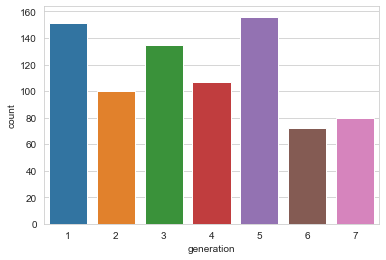

In [77]:
ax = sns.countplot(x="generation", data=df_pokemon)

Visualicémoslo en términos de porcentaje:

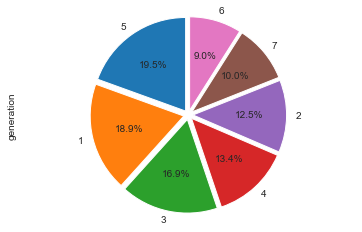

In [78]:
pp = pd.value_counts(df_pokemon.generation)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal')
plt.show()

***Observaciones:***
* La mayor parte de los Pokémon son de la 1ª y 5ª generación.

***¿Qué se puede hacer?***
* Veremos si los Pokémon de la generación posterior tienen más HP, son Pokémon legendarios o suficiente capacidad de ataque.

## is_legendary

Indica si el Pokémon es legendario.

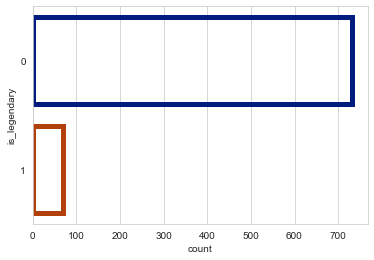

In [80]:
ax = sns.countplot(y=df_pokemon['is_legendary'], data=df_pokemon, facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))

***Observaciones:***
* Menos de 100 Pokémon se consideran legendarios.


***¿Qué se puede hacer?***
* Vea si los Pokémon legendarios tienen pasos de huevo excepcionales, experiencia, además de ataque, defensa y HP base.
* ¿Qué los hace tan especiales para alcanzar el estatus de leyenda? Lo veremos en el apartado de Análisis de datos.

# 5. Análisis de datos

Aquí veremos cómo cada característica interactúa con todas las demás características para obtener más información sobre si es probable que sean dependientes / correlacionadas.

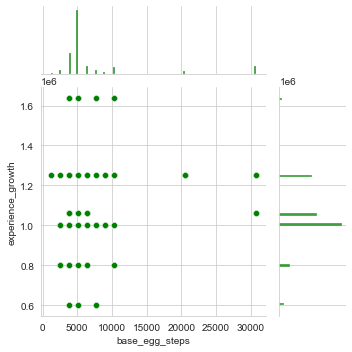

In [81]:
g = sns.jointplot("base_egg_steps", "experience_growth", data=df_pokemon, size=5, ratio=3, color="g")


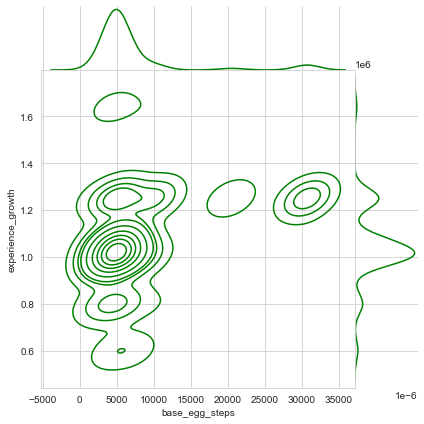

In [82]:
g = sns.jointplot("base_egg_steps", "experience_growth", data=df_pokemon, kind="kde", space=0, color="g")

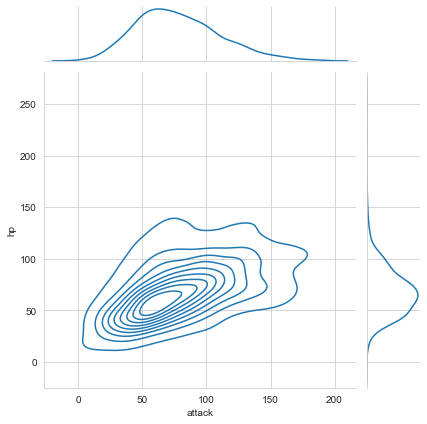

In [83]:
g = sns.jointplot("attack", "hp", data=df_pokemon, kind="kde")

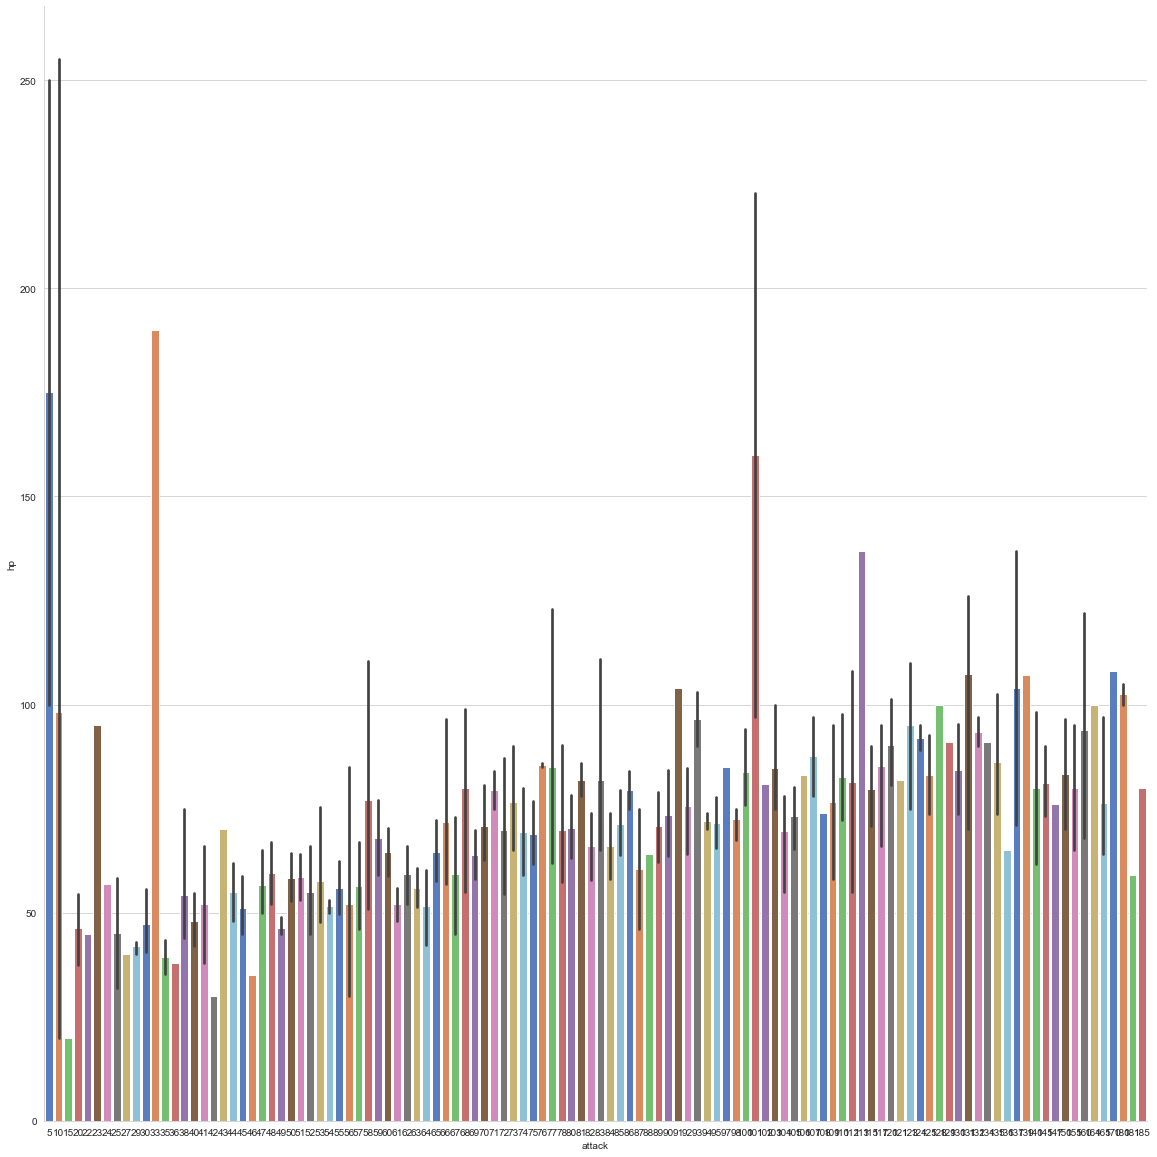

In [86]:
g = sns.factorplot(x="attack", y="hp", data=df_pokemon,
                   size=16, kind="bar", palette="muted")

Analicemos qué hace que ciertos Pokémon sean legendarios. Lo haremos evaluando su tipo primario, el recuento de huevos y el crecimiento de la experiencia.


In [87]:
lolo = []
for i in range(0, len(df_pokemon)):
    if(df_pokemon.is_legendary[i] > 0):
        lolo.append(df_pokemon.type1[i])
        
print(set(lolo))  

lolo = []
lulu = []
lulu_attack = []
for i in range(0, len(df_pokemon)):
    if(df_pokemon.is_legendary[i] > 0):
        lolo.append(df_pokemon.experience_growth[i])
        lulu.append(df_pokemon.base_egg_steps[i])
        lulu_attack.append(df_pokemon.attack[i])
        
print(set(lolo))
print(set(lulu))   
print(set(lulu_attack))   

df_pokemon.base_egg_steps.corr(df_pokemon.is_legendary)


{'dragon', 'ghost', 'psychic', 'ice', 'flying', 'bug', 'fairy', 'fire', 'electric', 'ground', 'normal', 'dark', 'grass', 'rock', 'water', 'steel'}
{1250000, 1059860}
{20480, 30720, 6400, 2560, 3840}
{128, 129, 130, 131, 137, 139, 145, 150, 29, 160, 50, 180, 53, 181, 70, 72, 75, 85, 89, 90, 95, 100, 101, 103, 105, 107, 110, 113, 115, 120, 125}


0.8734883403994571

## Análisis 1
## Correlación

Correlaciones entre columnas de tipo numérico.

<AxesSubplot:>

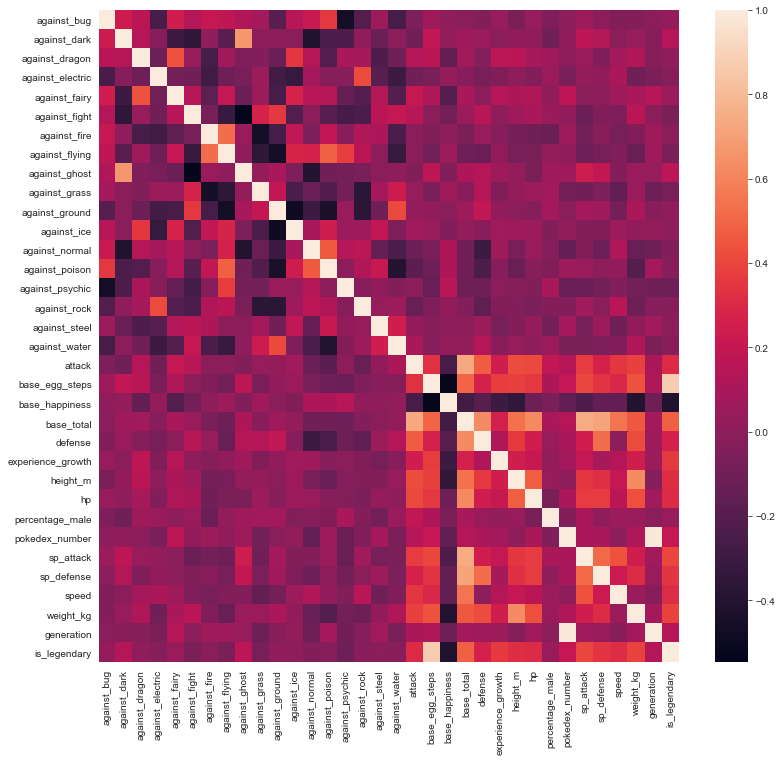

In [88]:
numeric_clmns = df_pokemon.dtypes[df_pokemon.dtypes != "object"].index 

f, ax = plt.subplots(figsize=(13, 12))
corr = df_pokemon[numeric_clmns].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Análisis 2
## Determinar las características que ejemplifican al Pokémon legendario

Para ver si el tipo primario o secundario de Pokémon tiene alguna correlación con que sea legendario, ¡tracemos una matriz de correlación y averigüémoslo!

Antes de eso tendremos que codificar las columnas ** type1 ** y ** type2 **.

<AxesSubplot:>

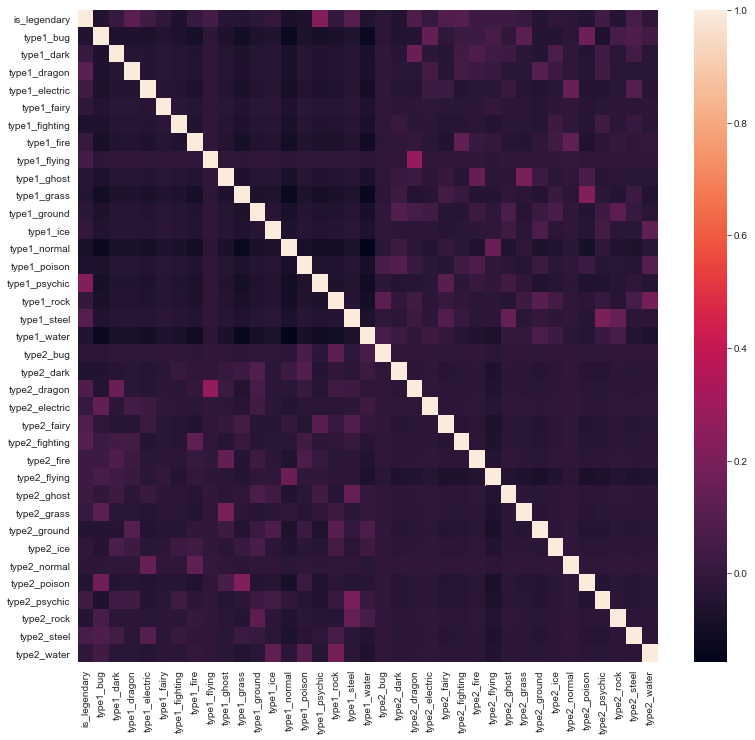

In [89]:
sd = df_pokemon[['type1', 'type2', 'is_legendary']]
md = pd.get_dummies(sd)

corr = md.corr()
f, ax = plt.subplots(figsize=(13, 12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Claramente, el tipo de Pokémon no determina el estado legendario de uno.

Tratemos la columna ** capture_rate **

In [90]:
df_pokemon.capture_rate.unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

Todos los valores aquí están en cadenas y uno de los valores es extraño '30 (Meteorito) 255 (Núcleo) '. Reemplacemos esto con otro valor 1000.

In [91]:
df_pokemon['capture_rate'].replace('30 (Meteorite)255 (Core)', '1000', inplace=True)
pd.to_numeric(df_pokemon['capture_rate'])
df_pokemon['capture_rate'] = df_pokemon['capture_rate'].astype(int)
df_pokemon.capture_rate.unique()

array([  45,  255,  120,  127,   90,  190,   75,  235,  150,   25,  170,
         50,  200,  100,  180,   60,  225,   30,   35,    3,   65,   70,
        125,  205,  155,  145,  130,  140,   15,  220,  160,   80,   55,
       1000])

Aquí hay un conjunto de atributos para determinar cuáles de ellos están más probablemente relacionados con un Pokémon legendario.

<AxesSubplot:>

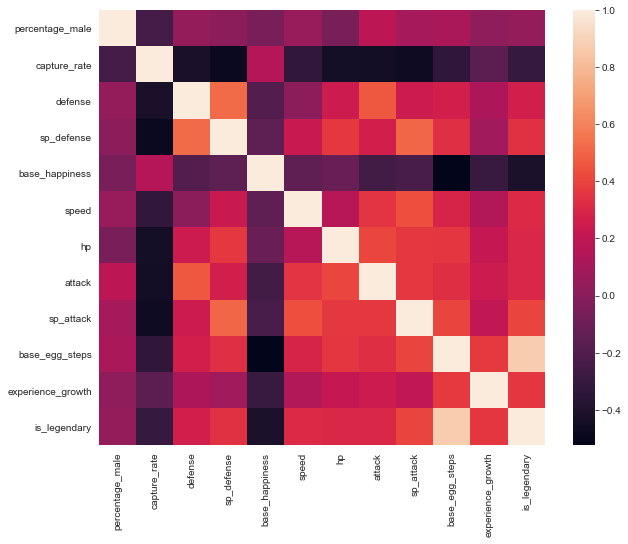

In [92]:
corr = df_pokemon[['percentage_male', 'capture_rate','defense','sp_defense','base_happiness', 'speed', 'hp','attack','sp_attack','base_egg_steps','experience_growth','is_legendary']].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

De la matriz de correlación anterior:
* ** base_egg_steps ** tiene una alta correlación con un Pokémon legendario.
* ** base_happiness **, ** percent_male ** y ** capture_rate ** tienen una correlación negativa.

Veámoslos en detalle.

In [93]:
corr = df_pokemon[['percentage_male', 'capture_rate','base_happiness','base_egg_steps','is_legendary']].corr()
print (corr)

                 percentage_male  capture_rate  base_happiness  \
percentage_male         1.000000     -0.250351       -0.059802   
capture_rate           -0.250351      1.000000        0.158412   
base_happiness         -0.059802      0.158412        1.000000   
base_egg_steps          0.115968     -0.329913       -0.524551   
is_legendary            0.045222     -0.307039       -0.413108   

                 base_egg_steps  is_legendary  
percentage_male        0.115968      0.045222  
capture_rate          -0.329913     -0.307039  
base_happiness        -0.524551     -0.413108  
base_egg_steps         1.000000      0.873488  
is_legendary           0.873488      1.000000  


**base_egg_steps** parece ser el criterio determinante para que un Pokémon sea legendario.

Veamos los pasos básicos del huevo de todos los Pokémon legendarios:

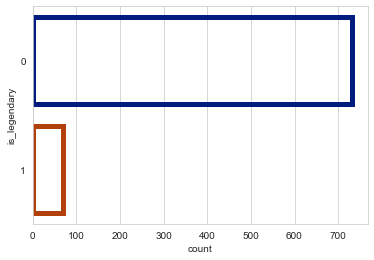

In [94]:
ax = sns.countplot(y=df_pokemon['is_legendary'], data=df_pokemon, facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))

Veamos correlaciones entre generaciones y si son legendarias.

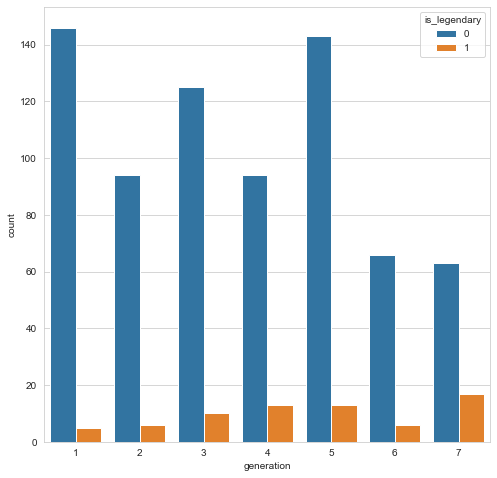

In [95]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x="generation", hue = 'is_legendary', data=df_pokemon, )

Cada generación tiene casi la misma cantidad de Pokémon legendarios.

## Análisis 3
## Encontrar la combinación más frecuente de Pokémon de tipo primario y secundario

Tenemos tipos primarios y secundarios de Pokémon. Veamos qué combinación es la más frecuente. A su vez, podemos averiguar si dicha combinación determina el estado legendario de Pokémon.

In [96]:
#--- Reemplazo de valores perdidos con un carácter de espacio ----
df_pokemon.type2 = df_pokemon.type2.fillna('')
print(df_pokemon.type2.isnull().sum())

0


In [97]:
df_pokemon['type1_&_type2'] = df_pokemon['type1'] + str(' ') + df_pokemon['type2']
df_pokemon['type1_&_type2'].nunique()

166

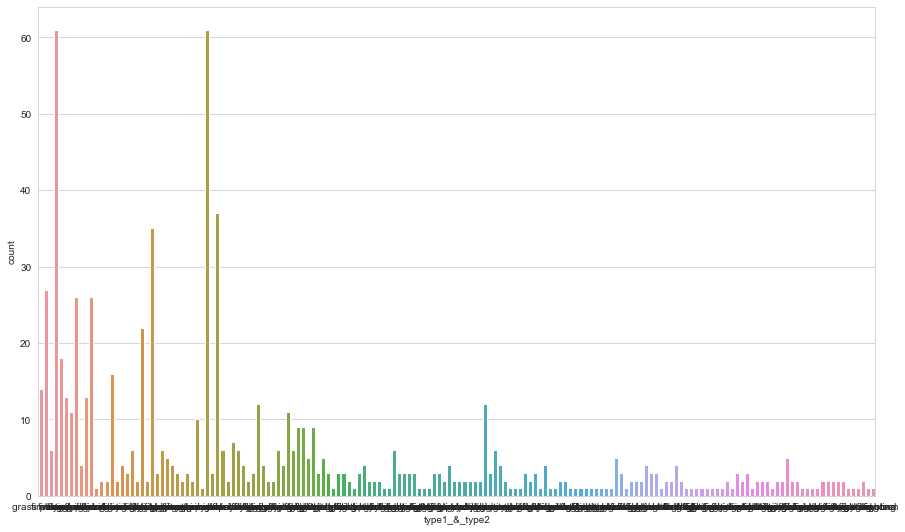

In [99]:
f, ax = plt.subplots(figsize=(15, 9))
ax = sns.countplot(x="type1_&_type2", data=df_pokemon)

Encontremos las ocurrencias más frecuentes de arriba de 10 en esta columna:

In [100]:
df_pokemon['type1_&_type2'].value_counts().reset_index(name="count").query("count > 10")["index"]

0           normal 
1            water 
2            grass 
3          psychic 
4             fire 
5     normal flying
6         electric 
7         fighting 
8              bug 
9            fairy 
10     grass poison
11          poison 
12       bug flying
13          dragon 
14             ice 
15            rock 
16       bug poison
Name: index, dtype: object

Veamos si esta nueva columna tiene algún impacto en que Pokémon sea legendario.

Para ello necesitamos encontrar correlaciones antes de las cuales tenemos que convertir la columna a una numérica:

In [101]:
df_pokemon['new_type1_&_type2'], _ = pd.factorize(df_pokemon['type1_&_type2'])
corr = df_pokemon[['new_type1_&_type2', 'is_legendary']].corr()
print(corr)

                   new_type1_&_type2  is_legendary
new_type1_&_type2           1.000000      0.160708
is_legendary                0.160708      1.000000


¡La combinación de ambos tipos (primario y secundario) no parece tener ningún impacto en el estado legendario de un Pokémon en absoluto!

## Análisis 4
## Encontrar Pokémon menos susceptibles a otros ataques

Para hacer esto, necesitamos crear una nueva columna que tomará el agregado de todas las columnas que pertenecen a la categoría *against_*.

Tenemos 18 columnas como las mencionadas anteriormente:

In [102]:
print(len(against_)) 
print(against_)

18
['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


Each of those columns have one of the following 5 unique values for each Pokemon.

In [103]:
print(result)

[0.5, 1.0, 2.0, 0.25, 4.0, 0.0]


Creando columnas adicionales llamadas **against_aggregate** y **against_mean**:

In [104]:
df_pokemon['against_aggregate'] = df_pokemon[against_].sum(axis=1)
df_pokemon['against_mean'] = df_pokemon[against_].mean(axis=1)
df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,speed,type1,type2,weight_kg,generation,is_legendary,type1_&_type2,new_type1_&_type2,against_aggregate,against_mean
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,grass,poison,6.9,1,0,grass poison,0,19.25,1.069444
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,grass,poison,13.0,1,0,grass poison,0,19.25,1.069444
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,grass,poison,100.0,1,0,grass poison,0,19.25,1.069444
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,65,fire,,8.5,1,0,fire,1,18.00,1.000000
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,80,fire,,19.0,1,0,fire,1,18.00,1.000000


Ahora para encontrar los Pokémon **menos** y **más** susceptibles a los ataques:

In [105]:
df_pokemon.name[df_pokemon['against_aggregate'].idxmax()]
df_pokemon.name[df_pokemon['against_aggregate'].idxmin()]

'Mawile'

Este fragmento dirá los Pokémon que son más fuertes y más débiles en la lista según la susceptibilidad agregada a otros ataques:

In [106]:
against_unique = df_pokemon['against_aggregate'].unique().tolist()
weak = min(against_unique)
strong = max(against_unique)

print ('Strong Pokemon')
print (df_pokemon.name[df_pokemon['against_aggregate'] == strong])
print ('Weak Pokemon')
print (df_pokemon.name[df_pokemon['against_aggregate'] == weak])

Strong Pokemon
697     Amaura
698    Aurorus
Name: name, dtype: object
Weak Pokemon
302      Mawile
706      Klefki
800    Magearna
Name: name, dtype: object


¿Esta columna tiene alguna correlación con la columna **is_legendary**?

In [107]:
corr = df_pokemon[['against_mean', 'is_legendary']].corr()
print(corr)

              against_mean  is_legendary
against_mean       1.00000      -0.02166
is_legendary      -0.02166       1.00000


¡¡Estas son buenas noticias!! Los Pokémon legendarios muestran una **alta** correlación negativa con la susceptibilidad a los ataques. ¡Esto significa que los Pokémon legendarios son menos susceptibles a los ataques de otros Pokémon!

Finalmente vemos cómo le va al promedio de esta columna para Pokémon legendarios y no legendarios:

In [109]:
df_pokemon.groupby('is_legendary', as_index=False)['against_aggregate'].mean()


,is_legendary,against_aggregate
0,0,19.056772
1,1,18.910714


# Anotaciones
Espero Ivan que te haya gustado este análisis de datos, ya que lo he hecho con todo el cariño hacia los pokémons.
Muchas grácias por enseñarnos tan bien, un saludo.


Juan
